In [1]:
!pip install nltk

In [6]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   ------- ------------------------------- 30.7/151.4 kB 660.6 kB/s eta 0:00:01
   ------- ------------------------------- 30.7/151.4 kB 660.6 kB/s eta 0:00:01
   ------- ------------------------------- 30.7/151.4 kB 660.6 kB/s eta 0:00:01
   ------- ------------------------------- 30.7/151.4 kB 660.6 kB/s eta 0:00:01
   ------------------ -------------------- 71.7/151.4 kB 245.8 kB/s eta 0:00:01
   ----------------------- -----

In [3]:
!pip install spacy

In [4]:
# Instalamos el modelo de idioma en español de spaCy
!python -m spacy download es_core_news_sm

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     --------------------------------------- 0.0/12.9 MB 640.0 kB/s eta 0:00:21
     --------------------------------------- 0.1/12.9 MB 787.7 kB/s eta 0:00:17
      --------------------------------------- 0.2/12.9 MB 1.5 MB/s eta 0:00:09
      --------------------------------------- 0.3/12.9 MB 1.9 MB/s eta 0:00:07
     - -------------------------------------- 0.4/12.9 MB 1.9 MB/s eta 0:00:07
     - -------------------------------------- 0.5/12.9 MB 1.9 MB/s eta 0:00:07
     - -------------------------------------- 0.5/12.9 MB 1.8 MB/s eta 0:00:07
     - -------------------------------------- 0.6/12.9 MB 1.7 MB/s eta 0:00:08
     -- ------------------------------------- 0.7/12.9 MB 1.8 MB/s eta 0:00:07
     -- ------------------------------------- 0.9/12.9 MB 1.9 MB/s eta 0:00:07
     --- ------------------------------------ 1.0/12.9 MB 2.0 MB/s eta 0:00:06
     --- ------------------------------------ 1.1/12.9 MB

In [5]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [10]:
# Leemos los dataframes
tweets = pd.read_csv('tweets_limpios_esp_vacios2.csv',sep=',')

In [11]:
import pandas as pd
import spacy
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import time

# Descargar léxicos necesarios
nltk.download('vader_lexicon')

# Cargar el modelo de lenguaje en español de spaCy
nlp = spacy.load("es_core_news_sm")

# Crear una instancia del analizador de sentimientos VADER
sia = SentimentIntensityAnalyzer()

# Definir una función para realizar el preprocesamiento
def preprocess_text(text):
    # Procesar el texto con spaCy
    doc = nlp(text)
    # Filtrar las palabras que no son stop words ni signos de puntuación
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    # Unir los tokens de nuevo en un texto
    preprocessed_text = " ".join(tokens)
    return preprocessed_text

# Función para aplicar el preprocesamiento en paralelo
def preprocess_parallel(column):
    with ThreadPoolExecutor(max_workers=4) as executor:
        result = list(tqdm(executor.map(preprocess_text, column), total=len(column), desc="Procesando"))
    return result

# Función para realizar el análisis de sentimientos
def analyze_sentiment(tweet):
    sentiment = sia.polarity_scores(tweet)
    if sentiment['compound'] >= 0.05:
        return 'Positivo'
    elif sentiment['compound'] <= -0.05:
        return 'Negativo'
    else:
        return 'Neutral'

# Función para aplicar el análisis de sentimientos en paralelo
def analyze_sentiment_parallel(column):
    with ThreadPoolExecutor(max_workers=4) as executor:
        result = list(tqdm(executor.map(analyze_sentiment, column), total=len(column), desc="Analizando Sentimientos"))
    return result

# Medir el tiempo de inicio
start_time = time.time()

# Aplicar el preprocesamiento a la columna "Tweet Limpio"
tweets['Tweet Procesado spaCy'] = preprocess_parallel(tweets['Tweet Limpio'])

# Aplicar el análisis de sentimientos a la columna "Tweet Procesado spaCy"
tweets['Sentimiento'] = analyze_sentiment_parallel(tweets['Tweet Procesado spaCy'])

# Medir el tiempo de finalización
end_time = time.time()

# Calcular el tiempo total de ejecución
total_time = end_time - start_time

# Guardar el DataFrame resultante con los sentimientos analizados
tweets.to_csv('tweets_con_sentimientos.csv', index=False)

# Muestra el tiempo total de ejecución
print(f"Tiempo total de ejecución: {total_time} segundos")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Analizando Sentimientos: 100%|██████████████████████████████████████████████| 443442/443442 [00:33<00:00, 13157.52it/s]


Tiempo total de ejecución: 3986.692647218704 segundos


In [12]:
tweets.head(200)

,Nombre BD,Nombre Usuario,Tweet,Tweet Limpio,Tweet Procesado spaCy,Sentimiento
0,Cantantes_Colombianos,Camilo,Gallo pinto en Costa Rica... y otras maneras d...,gallo pinto en costa rica y otras maneras de d...,gallo pinto costa rico manera disfrutar vida,Neutral
1,Cantantes_Colombianos,Camilo,"RT @rincondelatribu: La Tribu tiene casa, un h...",la tribu tiene casa un hogar es aqui,tribu casa hogar,Neutral
2,Cantantes_Colombianos,Camilo,Contando los días!! Ya quiero iiiiiiirrrrrr 🇧🇷...,contando los dias ya quiero iiiiiiirrrrrr,contar querer iiiiiiirrrrrr,Neutral
3,Cantantes_Colombianos,Camilo,En el aeropuerto en Buenos Aires por salir a c...,en el aeropuerto en buenos aires por salir a c...,aeropuerto aires salir bolivia \n decir recom...,Neutral
4,Cantantes_Colombianos,Camilo,Recorriendo el mundo con mi esposa y mi hija h...,recorriendo el mundo con mi esposa y mi hija h...,recorrer mundo esposa hija amar cambiario,Neutral
...,...,...,...,...,...,...
195,Cantantes_Colombianos,Camilo,Hoy me desperté con sonrisa de oreja a oreja!!...,hoy me desperte con sonrisa de oreja a oreja \...,despertar sonrisa oreja oreja \n octubre tri...,Neutral
196,Cantantes_Colombianos,Camilo,Thank you 🙏🏼💙💙💙 https://t.co/YfTlHGKEPF,thank you,thank you,Positivo
197,Cantantes_Colombianos,Camilo,Jajajaja SISISII https://t.co/t6lwaZYyBg,jajajaja sisisii,jajajaja sisisii,Neutral
198,Cantantes_Colombianos,Camilo,Te quiero hermano y recuerdo esa conversación ...,te quiero hermano y recuerdo esa conversacion ...,querer hermano recordar conversacion jjajajo \...,Negativo


In [15]:
# Contar el número de tweets positivos
tweets_positivos = tweets[tweets['Sentimiento'] == 'Positivo']

# Calcular el porcentaje de tweets positivos
porcentaje_positivos = (len(tweets_positivos) / len(tweets)) * 100

print(f"Porcentaje de tweets positivos: {porcentaje_positivos:.2f}%")

Porcentaje de tweets positivos: 7.02%


In [16]:
# Contar el número de tweets negativos
tweets_negativos = tweets[tweets['Sentimiento'] == 'Negativo']

# Calcular el porcentaje de tweets negativos
porcentaje_negativos = (len(tweets_negativos) / len(tweets)) * 100

print(f"Porcentaje de tweets negativos: {porcentaje_negativos:.2f}%")

Porcentaje de tweets negativos: 2.07%


In [17]:
# Contar el número de tweets neutrales
tweets_neutrales = tweets[tweets['Sentimiento'] == 'Neutral']

# Calcular el porcentaje de tweets negativos
porcentaje_neutrales = (len(tweets_neutrales) / len(tweets)) * 100

print(f"Porcentaje de tweets negativos: {porcentaje_neutrales:.2f}%")

Porcentaje de tweets negativos: 90.91%


In [18]:
# Tabla que muestra la frecuencia de cada sentimiento para cada valor único de nombre_bd
tabla = pd.crosstab(tweets['Nombre BD'], tweets['Sentimiento'])
print(tabla)

Sentimiento                          Negativo  Neutral  Positivo
Nombre BD                                                       
Cantantes_Colombianos                     591    34459      4512
Deportistas_Colombianos                   765    35919      4935
Empresas_Colombianas                      462    33793      6088
Famosos                                  1047    39092      4273
Futbol_Colombiano                         259    39661      1375
Instituciones_del_Estado_Colombiano       822    45182      1662
Medios_Informaticos                      1595    51882      2349
Periodistas                              1538    42985      2162
Politicos_Colombianos                    1560    42171      2173
Universidades_Colombianas                 540    37971      1619


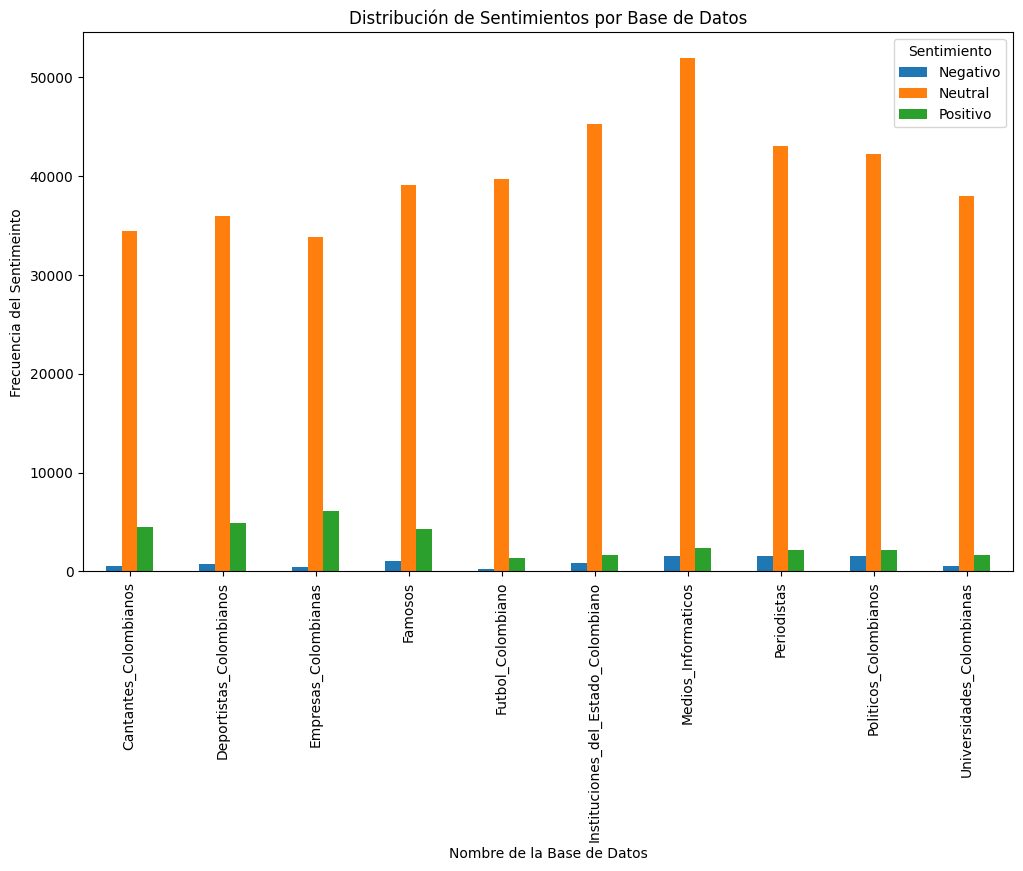

In [19]:
# Gráfico de barras agrupadas para visualizar la distribución
tabla.plot(kind='bar', figsize=(12, 7))
plt.title('Distribución de Sentimientos por Base de Datos')
plt.xlabel('Nombre de la Base de Datos')
plt.ylabel('Frecuencia del Sentimeinto')
plt.legend(title='Sentimiento', loc='upper right')
plt.show()

In [27]:
# Nube de Palabras por cada Sentimiento
# Filtra los tweets por categoría de sentimiento
tweets_positivos = tweets[tweets['Sentimiento'] == 'Positivo']['Tweet Procesado spaCy'].tolist()
tweets_negativos = tweets[tweets['Sentimiento'] == 'Negativo']['Tweet Procesado spaCy'].tolist()
tweets_neutrales = tweets[tweets['Sentimiento'] == 'Neutral']['Tweet Procesado spaCy'].tolist()

In [22]:
# Muestra algunos ejemplos de tweets en cada categoría
print("Ejemplos de tweets positivos:")
print(tweets_positivos[:3])

print("Ejemplos de tweets negativos:")
print(tweets_negativos[:3])

print("Ejemplos de tweets neutrales:")
print(tweets_neutrales[:3])

Ejemplos de tweets positivos:
                Nombre BD Nombre Usuario  \
5   Cantantes_Colombianos         Camilo   
8   Cantantes_Colombianos         Camilo   
11  Cantantes_Colombianos         Camilo   

                                                Tweet  \
5   Me llevo una maleta llena de cartas, amor y ma...   
8   Algo que tenemos en común JP y yo es que no no...   
11  Qué increíble partido hizo Argentinaaaaaaaa!!!...   

                                         Tweet Limpio  \
5   me llevo una maleta llena de cartas amor y mat...   
8   algo que tenemos en comun jp y yo es que no no...   
11  que increible partido hizo argentinaaaaaaaa\np...   

                                Tweet Procesado spaCy Sentimiento  
5   llevar maleta lleno carta amor mate amo argentino    Positivo  
8   comun jp gustar gente amar moderacion \n\n mod...    Positivo  
11  increible partido argentinaaaaaaaa \n fiesta \...    Positivo  
Ejemplos de tweets negativos:
                 Nombre BD Nombre

In [28]:
# Función para crear y mostrar nubes de palabras
def generar_y_mostrar_nube_de_palabras(texto, categoria):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(texto))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Nube de Palabras - ' + categoria)
    plt.axis('off')
    plt.show()

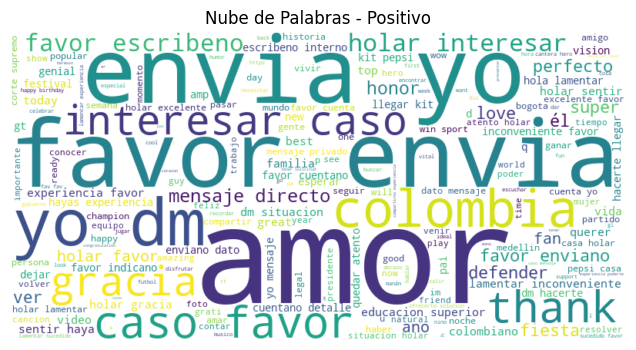

In [29]:
# Generar y mostrar nubes de palabras para Tweets Positivos
generar_y_mostrar_nube_de_palabras(tweets_positivos, "Positivo")

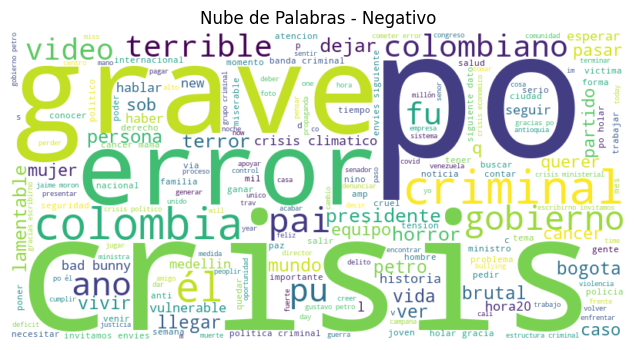

In [30]:
# Generar y mostrar nubes de palabras para Tweets Negativos
generar_y_mostrar_nube_de_palabras(tweets_negativos, "Negativo")

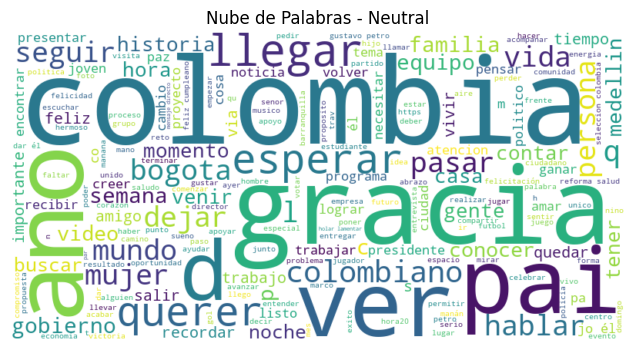

In [31]:
# Generar y mostrar nubes de palabras para Tweets Neutrales
generar_y_mostrar_nube_de_palabras(tweets_neutrales, "Neutral")